In [1]:
TEST = True

Check which hyper-parameters are required by TransE:

In [2]:
from datetime import datetime
from pykeen.kge_models import TransE
TransE.hyper_params

['embedding_dim',
 'margin_loss',
 'learning_rate',
 'corrupt_relations',
 'scoring_function',
 'normalization_of_entities']

Train and evaluate Region (provide test set):
* Define the path to our test set: **test_set_path**
* Define the path to our the negative test set: **neg_test_path** in case of triple classfication evaluation
* Define whether you want to compute the metrics (mean rank and hits@k) in raw or in a filtered setting: **filter_negative_triples**

In [3]:
config = dict(
    metrics                     = [],    
    training_set_path           = '../../../data/fb15k/train.tsv',
    test_set_path               = '../../../data/fb15k/valid_200.tsv',
    #neg_test_set_path           = '../../../data/fb15k/valid_neg.tsv',
    mapping_path                = '../../../data/fb15k/',
    
    execution_mode              = 'Training_mode',
    random_seed                 = 2,
    kg_embedding_model_name     = 'TransE',
    loss_type                   = 'BPR',
    embedding_dim               = 50,
    scoring_function            = 1,  # corresponds to L1
    normalization_of_entities   = 2,  # corresponds to L2
    margin_loss                 = 1,
    es_metric                   = 'custom',
    
    learning_rate               = 0.01,
    num_epochs                  = 1000 if not TEST else 1000,  
    batch_size                  = 2**13,
    test_batch_size             = 2**16,
    filter_negative_triples     = False,
    corrupt_relations           = False,
    neg_factor                  = 1,
    preferred_device            = 'gpu1'
)

In [4]:
date = datetime.today()
stamp = "{:04d}{:2d}{:2d}".format(date.year, date.month, date.day)
stamp

'20191025'

In [5]:
output_directory = '../../../models/TransE_FB15k_{}_dim{}_loss-{}_lr{}_margin{}_epochs{}_bs{}_esmetric-{}/'.format(
    stamp, 
    config['embedding_dim'],
    config['loss_type'],
    str(config['learning_rate']).replace('.',''),
    config['margin_loss'],
    config['num_epochs'],
    config['batch_size'],
    config['es_metric']
)
output_directory

'../../../models/TransE_FB15k_20191025_dim50_loss-BPR_lr001_margin1_epochs1000_bs8192_esmetric-custom/'

In [6]:
if TEST:
    output_directory = '../../../models/test/'

In [7]:
import logging
import os
import sys
import time
import pykeen

In [8]:
logging.basicConfig(level=logging.DEBUG)
logging.getLogger('pykeen').setLevel(logging.DEBUG)

In [9]:
print(sys.version)

3.6.5 (default, Mar 31 2018, 19:45:04) [GCC]


In [10]:
print(time.asctime())

Fri Oct 25 15:50:34 2019


In [11]:
print(pykeen.get_version())

0.0.26-dev


## Train and evaluate TransE:

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

In [ ]:
# my
results = pykeen.run(
    config=config,
    output_directory=output_directory,
)

DEBUG:pykeen.utilities.pipeline:Reading the label mappings...
/mounts/Users/student/speranskaya/.local/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
INFO:pykeen.utilities.pipeline:-------------Train KG Embeddings-------------


{'metrics': [], 'training_set_path': '../../../data/fb15k/train.tsv', 'test_set_path': '../../../data/fb15k/valid_200.tsv', 'mapping_path': '../../../data/fb15k/', 'execution_mode': 'Training_mode', 'random_seed': 2, 'kg_embedding_model_name': 'TransE', 'loss_type': 'BPR', 'embedding_dim': 50, 'scoring_function': 1, 'normalization_of_entities': 2, 'margin_loss': 1, 'es_metric': 'custom', 'learning_rate': 0.01, 'num_epochs': 1000, 'batch_size': 8192, 'test_batch_size': 65536, 'filter_negative_triples': False, 'corrupt_relations': False, 'neg_factor': 1, 'preferred_device': 'cuda:1', 'pykeen-version': '0.0.26-dev', 'num_entities': 14951, 'num_relations': 1345}


DEBUG:pykeen.utilities.train_utils:****running model on cuda:1****
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 4.10s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.11619370351944489  ---- rank/hits@10: (0.09205195523624933, 0.1575)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch   0 / 1000 (0.3s):  0.541 ---- 0.353 ---- 0.12 ----   1
INFO:pykeen.utilities.train_utils:Epoch   1 / 1000 (0.3s):  0.257 ---- 0.198 ---- 0.12 ----   2
INFO:pykeen.utilities.train_utils:Epoch   2 / 1000 (0.2s):  0.161 ---- 0.148 ---- 0.12 ----   3
INFO:pykeen.utilities.train_utils:Epoch   3 / 1000 (0.2s):  0.121 ---- 0.119 ---- 0.12 ----   4
INFO:pykeen.utilities.train_utils:Epoch   4 / 1000 (0.4s):  0.101 ---- 0.105 ---- 0.12 ----   5
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.47s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.20541386536633896  ---- 

DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.48s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.27091556119369403  ---- rank/hits@10: (0.21126608531934343, 0.3775)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  55 / 1000 (0.4s):  0.038 ---- 0.046 ---- 0.27 ----   1
INFO:pykeen.utilities.train_utils:Epoch  56 / 1000 (0.4s):  0.038 ---- 0.046 ---- 0.27 ----   2
INFO:pykeen.utilities.train_utils:Epoch  57 / 1000 (0.3s):  0.038 ---- 0.042 ---- 0.27 ----   3
INFO:pykeen.utilities.train_utils:Epoch  58 / 1000 (0.3s):  0.038 ---- 0.043 ---- 0.27 ----   4
INFO:pykeen.utilities.train_utils:Epoch  59 / 1000 (0.3s):  0.037 ---- 0.040 ---- 0.27 ----   5
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.32s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2799480676769086  ---- rank/hits@10: (0.2160546343349427, 0.3975)
DEBUG:pykeen.utilities.tr

Check result entries:

In [15]:
results.results.keys()

odict_keys(['trained_model', 'losses', 'validation_losses', 'metric_per_epoch', 'entity_to_embedding', 'relation_to_embedding', 'eval_summary', 'entity_to_id', 'relation_to_id', 'final_configuration', 'search_summary'])

Visualize loss values:

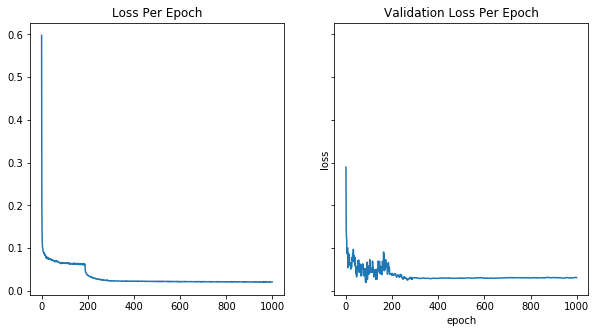

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5), sharey=True)
losses = results.results['losses']
epochs = np.arange(len(losses))
ax1.set_title('Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
ax1.plot(epochs, losses) #plt.subplot(122)
val_losses = results.results['validation_losses']
epochs = np.arange(len(val_losses))
plt.title(r'Validation Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
ax2.plot(epochs, val_losses)
plt.show()


from sklearn.preprocessing import minmax_scale
metric = minmax_scale(results.results['metric_per_epoch'], feature_range=(0,1))
epochs = np.arange(len(losses)) * 15
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, metric)

val_losses = minmax_scale(results.results['validation_losses'], feature_range=(0,1))
epochs = np.arange(len(val_losses))
plt.title(r'Early stopping evaluation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, val_losses)

plt.legend(["metric", "val_loss"])
plt.show()

In [17]:
results.results['eval_summary']

{'mean_rank': None,
 'hits@k': None,
 'precision': None,
 'recall': None,
 'accuracy': None,
 'f1_score': None}

## Load and evaluate

In [35]:
import torch
import json
import os
import pykeen.constants as pkc
from pykeen.kge_models import get_kge_model
from pykeen.utilities.pipeline import Pipeline

In [36]:
model_dir = '../../../models/'
models = os.listdir(model_dir)
models

['test',
 'region_FB15k_dim50_sphere_rad0_regL0_lr01_loss-MRL_margin0.5_negfactor1_epochs5_esmetric-custom_final',
 'region_FB15k_20191023_dim50_sphere_rad0_regL0_lr001_loss-BPR_margin0.5_negfactor1_epochs1000_esmetric-custom_final',
 'region_FB15k_20191023_dim50_sphere_rad0_regL0_lr001_loss-BPR_margin0.5_negfactor1_epochs500_esmetric-custom_final',
 'region_FB15k_dim50_sphere_rad0_regL0_lr01_loss-MRL_margin0.5_negfactor1_epochs500_esmetric-custom_final',
 'region_FB15k_20191023_dim50_sphere_rad0_regL0_lr001_loss-MRL_margin0.5_negfactor1_epochs1000_esmetric-custom',
 '.directory',
 'TransE_FB15k_20191023_dim50_lr001_margin1_epochs1000_bs8192_esmetric-custom_final',
 'region_FB15k_20191023_dim50_sphere_rad0_regL0_lr001_loss-BPR_margin0.5_negfactor1_epochs1000_esmetric-custom',
 'region_FB15k_dim50_sphere_rad0_regL0_lr01_loss-MRL_margin0.5_negfactor1_epochs500_esmetric-custom_bs-2048',
 'reference masterarbeit',
 'region_FB15k_dim50_sphere_rad0_regL0_lr01_loss-MRL_margin0.5_negfactor1_ep

In [20]:
model_path = ''
if model_path:
    input_directory = os.path.join(model_dir, model_path)
    results = {
    'losses': json.load(open(os.path.join(input_directory, 'losses.json'))),
    'validation_losses': json.load(open(os.path.join(input_directory, 'val_losses.json'))),
    'entity_to_embedding': json.load(open(os.path.join(input_directory, 'entities_to_embeddings.json'))),
    'relation_to_embedding': json.load(open(os.path.join(input_directory, 'relations_to_embeddings.json'))),
    'final_configuration': json.load(open(os.path.join(input_directory, 'configuration.json'))),
    'eval_summary': json.load(open(os.path.join(input_directory, 'evaluation_summary.json'))),
    'entity_to_id': json.load(open(os.path.join(input_directory, 'entity_to_id.json'))),
    'relation_to_id': json.load(open(os.path.join(input_directory, 'relation_to_id.json')))
    }
    # Initialize KG embedding model
    config = results['final_configuration']
    config['training_set_path'] = '../../../data/fb15k/train.tsv'
    config['test_set_path'] = '../../../data/fb15k/valid.tsv'
    config['neg_test_set_path'] = '../../../data/fb15k/valid_neg.tsv'
    relation_to_id = results['relation_to_id']
    entity_to_id = results['entity_to_id']
else:
    # Initialize KG embedding model
    input_directory = output_directory
    config[pkc.NUM_ENTITIES] = 14951
    config[pkc.NUM_RELATIONS] = 1345
    config[pkc.PREFERRED_DEVICE] = 'gpu1'
    relation_to_id = json.load(open(os.path.join(input_directory, 'relation_to_id.json'),'r'))
    entity_to_id = json.load(open(os.path.join(input_directory, 'entity_to_id.json'),'r'))

Get evaluation results:
 * Mean rank
 * Hits@k, k $\in$ {1,3,5,10} 

In [21]:
pipeline = Pipeline(config)
config[pkc.PREFERRED_DEVICE] = pipeline.device_name
if config['random_seed'] is not None:
    torch.manual_seed(config['random_seed'])
pipeline.entity_label_to_id = entity_to_id
pipeline.relation_label_to_id = relation_to_id
    
model: torch.nn.Module = get_kge_model(config=config)
model.load_state_dict(torch.load(os.path.join(input_directory, 'best_model.pkl')))

#results['trained_model'] = model 
type(model)

pykeen.kge_models.trans_e.TransE

In [22]:
metrics =[pkc.MEAN_RANK, pkc.HITS_AT_K, pkc.TRIPLE_PREDICTION] #  [pkc.MEAN_RANK, pkc.HITS_AT_K, pkc.TRIPLE_PREDICTION]

#### Evaluate RelationalTriple

In [23]:
val_results = pipeline.evaluate(
    model, 
    '../../../data/fb15k/valid.tsv', 
    neg_test_path = '../../../data/fb15k/valid_neg.tsv', 
    metrics=metrics,
    threshold_search=True,
    single_threshold=False
)

INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 185.79s seconds
INFO:pykeen.utilities.pipeline:MetricResults(mean_rank=0.2155433599275956, hits_at_k={1: 0.11919, 3: 0.23889, 5: 0.3092, 10: 0.41485}, precision=None, recall=None, accuracy=None, fscore=None)


In [24]:
val_results_ = pipeline.evaluate(
    model, 
    '../../../data/fb15k/valid.tsv', 
    neg_test_path = '../../../data/fb15k/valid_neg.tsv', 
    metrics=['prediction'],
    threshold_search=True,
    single_threshold=True
)

INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.70s seconds
INFO:pykeen.utilities.pipeline:MetricResults(mean_rank=None, hits_at_k=None, precision=None, recall=None, accuracy=None, fscore=None)


In [25]:
val_results['eval_summary']

{'mean_rank': 0.2155433599275956,
 'hits@k': {1: 0.11919, 3: 0.23889, 5: 0.3092, 10: 0.41485},
 'precision': None,
 'recall': None,
 'accuracy': None,
 'f1_score': None}

In [26]:
model.relation_thresholds.tolist()

[8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.68833890914917,
 8.688338909

In [27]:
test_results = pipeline.evaluate(
    model, 
    '../../../data/fb15k/test.tsv', 
    neg_test_path = '../../../data/fb15k/test_neg.tsv',
    metrics= metrics,
    threshold_search=False
)

INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Best accuracy 0.71 achieved on threshold: 8.69
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 212.41s seconds
INFO:pykeen.utilities.pipeline:MetricResults(mean_rank=0.21714436505782908, hits_at_k={1: 0.12060909752670515, 3: 0.24133669651774983, 5: 0.3120397487768956, 10: 0.417150547646053}, precision=0.8224918189799665, recall=0.5233532528651961, accuracy=0.7051572923368663, fscore=0.639678040100147)


In [28]:
test_results['eval_summary']

{'mean_rank': 0.21714436505782908,
 'hits@k': {1: 0.12060909752670515,
  3: 0.24133669651774983,
  5: 0.3120397487768956,
  10: 0.417150547646053},
 'precision': 0.8224918189799665,
 'recall': 0.5233532528651961,
 'accuracy': 0.7051572923368663,
 'f1_score': 0.639678040100147}

In [29]:
json.dump(val_results['eval_summary'], open(os.path.join(input_directory, 'valid_evaluation_summary.json'),"w"))

In [30]:
json.dump(test_results['eval_summary'], open(os.path.join(input_directory, 'evaluation_summary.json'),"w"))

## Load results

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [32]:
%matplotlib inline

In [33]:
model_dir = '../../../models/'
models = os.listdir(model_dir)
models

['test',
 'region_FB15k_dim50_sphere_rad0_regL0_lr01_loss-MRL_margin0.5_negfactor1_epochs5_esmetric-custom_final',
 'region_FB15k_20191023_dim50_sphere_rad0_regL0_lr001_loss-BPR_margin0.5_negfactor1_epochs1000_esmetric-custom_final',
 'region_FB15k_20191023_dim50_sphere_rad0_regL0_lr001_loss-BPR_margin0.5_negfactor1_epochs500_esmetric-custom_final',
 'region_FB15k_dim50_sphere_rad0_regL0_lr01_loss-MRL_margin0.5_negfactor1_epochs500_esmetric-custom_final',
 'region_FB15k_20191023_dim50_sphere_rad0_regL0_lr001_loss-MRL_margin0.5_negfactor1_epochs1000_esmetric-custom',
 '.directory',
 'TransE_FB15k_20191023_dim50_lr001_margin1_epochs1000_bs8192_esmetric-custom_final',
 'region_FB15k_20191023_dim50_sphere_rad0_regL0_lr001_loss-BPR_margin0.5_negfactor1_epochs1000_esmetric-custom',
 'region_FB15k_dim50_sphere_rad0_regL0_lr01_loss-MRL_margin0.5_negfactor1_epochs500_esmetric-custom_bs-2048',
 'reference masterarbeit',
 'region_FB15k_dim50_sphere_rad0_regL0_lr01_loss-MRL_margin0.5_negfactor1_ep

In [37]:
#output_directory = '../../../models/region_hpo/'
model_path = 'region_FB15k_20191023_dim50_sphere_rad0_regL0_lr001_loss-BPR_margin0.5_negfactor1_epochs1000_esmetric-custom'
input_directory = os.path.join(model_dir, model_path)


results = {
    'losses': json.load(open(os.path.join(input_directory, 'losses.json'))),
    'validation_losses': json.load(open(os.path.join(input_directory, 'val_losses.json'))),
    'entity_to_embedding': json.load(open(os.path.join(input_directory, 'entities_to_embeddings.json'))),
    'relation_to_embedding': json.load(open(os.path.join(input_directory, 'relations_to_embeddings.json'))),
    'final_configuration': json.load(open(os.path.join(input_directory, 'configuration.json'))),
    'eval_summary': json.load(open(os.path.join(input_directory, 'evaluation_summary.json'))),
    'entity_to_id': json.load(open(os.path.join(input_directory, 'entity_to_id.json'))),
    'relation_to_id': json.load(open(os.path.join(input_directory, 'relation_to_id.json')))
}

In [38]:
results.keys()

dict_keys(['losses', 'validation_losses', 'entity_to_embedding', 'relation_to_embedding', 'final_configuration', 'eval_summary', 'entity_to_id', 'relation_to_id'])

In [39]:
results['final_configuration']

{'metrics': [],
 'training_set_path': '../../../data/fb15k/train.tsv',
 'test_set_path': '../../../data/fb15k/valid_200.tsv',
 'mapping_path': '../../../data/fb15k/',
 'execution_mode': 'Training_mode',
 'random_seed': 2,
 'kg_embedding_model_name': 'Region',
 'region_type': 'sphere',
 'embedding_dim': 50,
 'init_radius': 0,
 'reg_lambda': 0,
 'loss_type': 'BPR',
 'neg_factor': 1,
 'corrupt_relations': False,
 'normalization_of_entities': 2,
 'margin_loss': 0.5,
 'learning_rate': 0.01,
 'es_metric': 'custom',
 'num_epochs': 1000,
 'batch_size': 8192,
 'test_batch_size': 65536,
 'filter_negative_triples': False,
 'preferred_device': 'cuda:0',
 'pykeen-version': '0.0.26-dev',
 'num_entities': 14951,
 'num_relations': 1345}

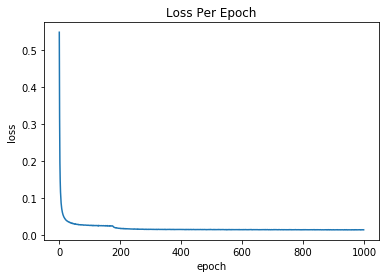

In [43]:
losses = results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [44]:
losses[-1]

0.013457278456898088

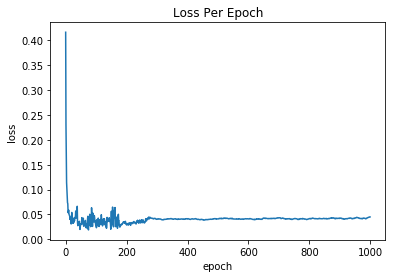

In [45]:
losses = results['validation_losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [46]:
losses[-1]

0.044965057373046874

In [42]:
results['eval_summary']

{'mean_rank': None,
 'hits@k': None,
 'precision': None,
 'recall': None,
 'accuracy': None,
 'f1_score': None}